<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Online_retail_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filename = "/content/OnlineRetail.csv"
df=pd.read_csv(filename,encoding= 'unicode_escape')

In [2]:
#Muestra la cabecera de la trama de datos
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df2 = df
df2 = df2.dropna(subset=["CustomerID"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
#Revisión de datos duplicados
df2.drop_duplicates(inplace=True) #para ver duplicados en la base
df2.info()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [6]:
df2.groupby(['Country']).sum()

,Quantity,UnitPrice,CustomerID
Country,,,
Australia,83643,4048.000,1.568057e+07
Austria,4827,1701.520,5.021102e+06
Bahrain,260,78.950,2.100270e+05
Belgium,23152,7540.130,2.571829e+07
Brazil,356,142.600,4.086080e+05
Canada,2763,910.580,2.615483e+06
Channel Islands,9473,3736.900,1.127029e+07
Cyprus,6296,3880.040,7.579696e+06
Czech Republic,592,88.150,3.834300e+05


In [7]:
import numpy as np
df2.groupby(['Country']).nunique()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
Country,,,,,,,
Australia,69,600,609,67,66,77,9
Austria,19,307,307,23,19,44,11
Bahrain,2,16,16,8,2,8,2
Belgium,119,778,785,38,119,66,25
Brazil,1,32,32,7,1,16,1
Canada,6,147,147,19,6,30,4
Channel Islands,33,430,436,25,33,55,9
Cyprus,20,498,498,29,20,56,8
Czech Republic,5,25,25,12,5,17,1


In [8]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.
import pandas as pd
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.003600
UnitPrice,-0.001235,1.000000,-0.004560
CustomerID,-0.003600,-0.004560,1.000000


K-MEANS

In [9]:
df_sample=df2.sample(n = 15000)

X= df_sample[["Quantity","UnitPrice","CustomerID"]]

# Entrenamiento de K-Means
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

METODO DEL CODO

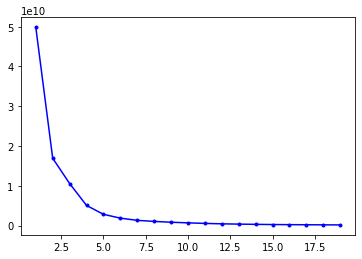

In [10]:
import matplotlib.pyplot as plt

score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    
plt.plot(k_clusters, score,'b.-')

CLUSTER

In [11]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2)

In [12]:
agg_cluster

AgglomerativeClustering()

In [13]:
y_pred = agg_cluster.fit_predict(X)

In [14]:
print(y_pred)

[0 0 1 ... 0 0 0]


DBSCAN

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)

In [16]:
count=0
for i in range(0, len(y_pred)):
    if y_pred[i]==-1:
        count=count+1
print(count)

0


In [17]:
y_pred = dbscan.fit_predict(X)
print(y_pred)

[426  -1   0 ...  -1  -1  -1]


In [18]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
km = KMeans(n_clusters=2, random_state=30)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.623


For n_clusters = 2 The average silhouette_score is : 0.6232940219562433
For n_clusters = 3 The average silhouette_score is : 0.590146110782315
For n_clusters = 4 The average silhouette_score is : 0.5919845271108566
For n_clusters = 5 The average silhouette_score is : 0.5849658798395565
For n_clusters = 6 The average silhouette_score is : 0.5726245455818716


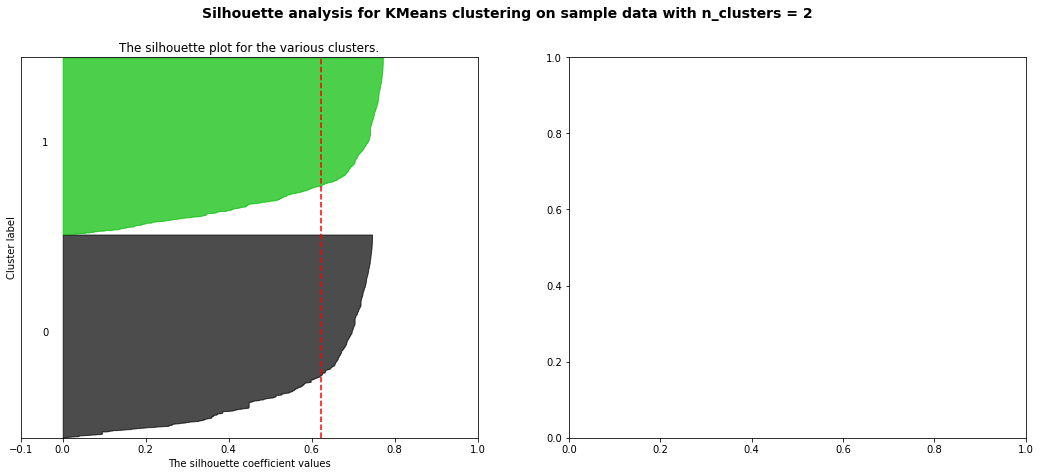

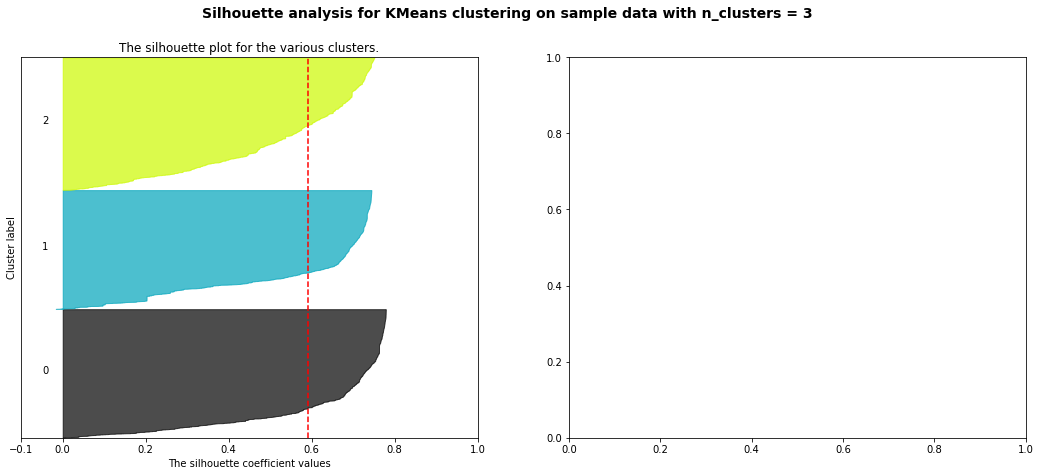

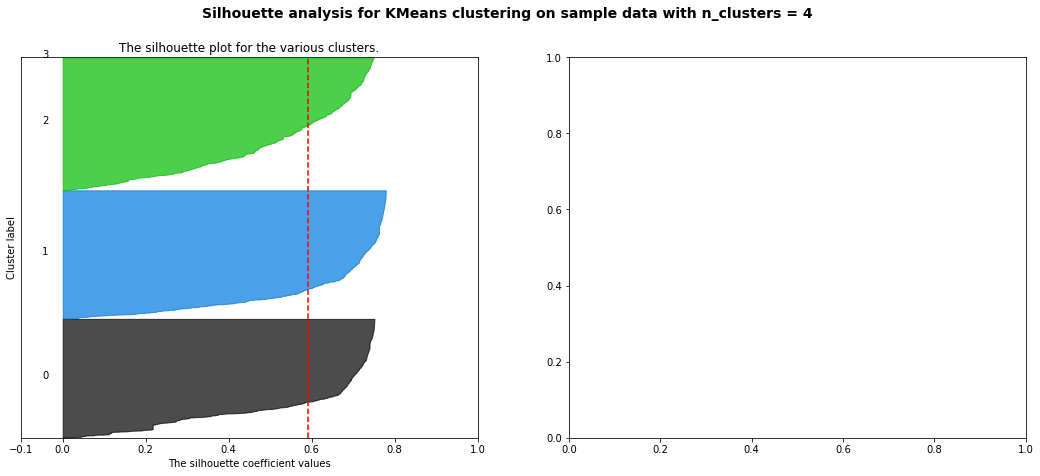

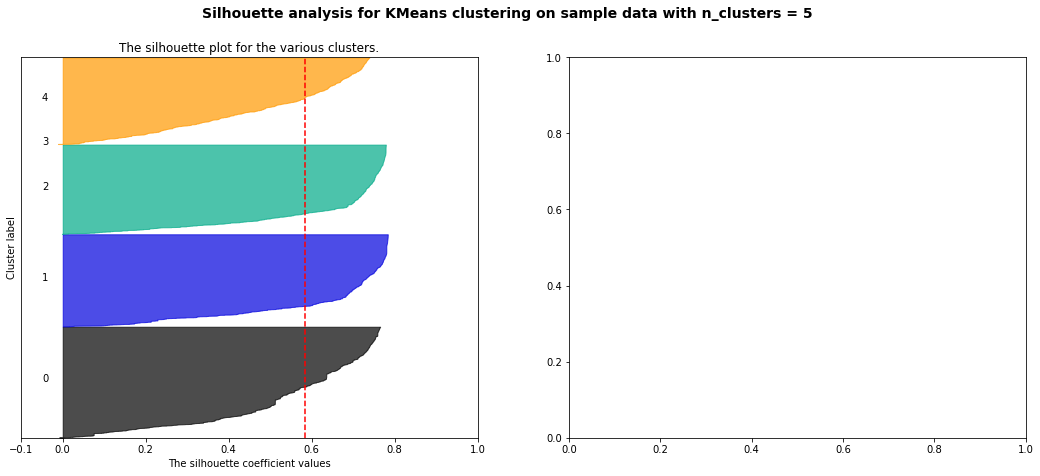

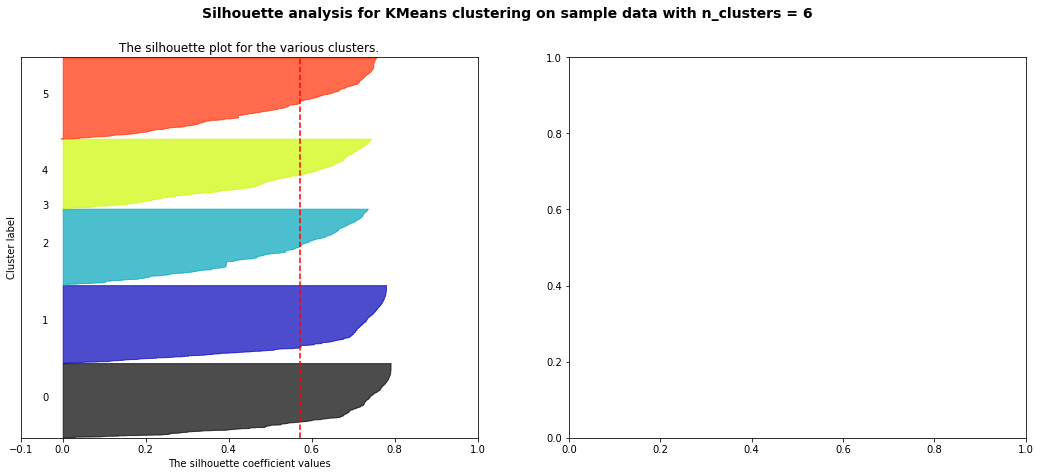

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()